In [1]:
from transformers import pipeline, BertTokenizer, BertModel, BertForMaskedLM
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import numpy as np


from datasets import load_dataset, get_dataset_split_names, get_dataset_config_names

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
dataset = load_dataset('oscar', 'unshuffled_deduplicated_tt', split='train')

Found cached dataset oscar (/home/kamil/.cache/huggingface/datasets/oscar/unshuffled_deduplicated_tt/1.0.0/84838bd49d2295f62008383b05620571535451d84545037bb94d6f3501651df2)


In [3]:
checkpoint = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(checkpoint)
bert = BertForMaskedLM.from_pretrained(checkpoint)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
from dataset import CustomDataset
from trainer import train_model
        
cdataset = CustomDataset(dataset, max_length=512)
# model = pipeline('fill-mask', model='bert-base-uncased', tokenizer=tokenizer)

In [5]:
EPOCHS = 2
BATCH_SIZE = 8
LR = 3e-4


train, test, _ = random_split(cdataset, [0.01, 0.01, 0.98])
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
train_losses = train_model(
    bert, train_loader, test_loader, epochs=EPOCHS, lr=LR, use_tqdm=True
)

  0%|          | 0/2 [00:00<?, ?it/s]

epoch 0:
accuracy: 0.30713422007255137
epoch 1:
accuracy: 0.3422007255139057


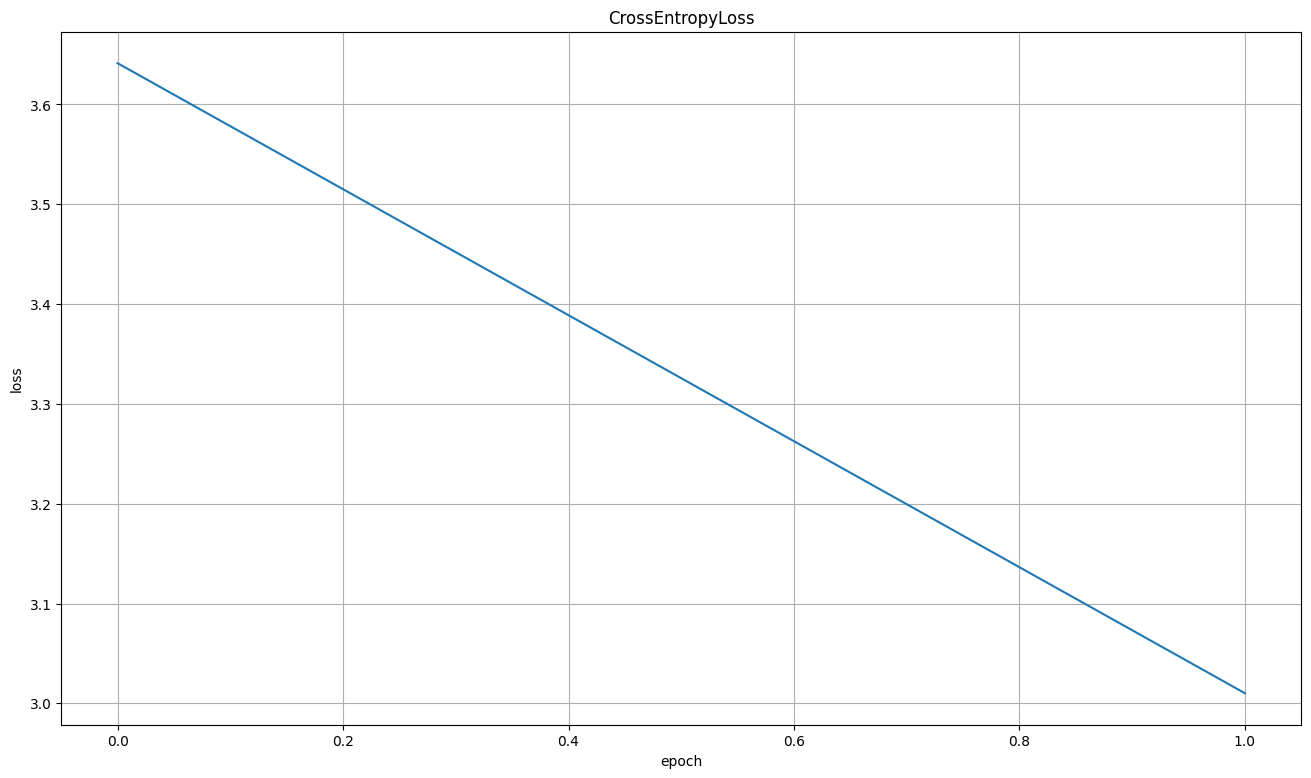

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(np.arange(EPOCHS), train_losses)

plt.title("CrossEntropyLoss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.show()